In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from sample_generator import SampleGenerator
from lines import Line

In [16]:
def profile():
    return lambda d: torch.clip(1-torch.abs(d),0)
def length():
    return np.random.rand()*400+50
def orientation():
    return np.random.rand()*np.pi

In [17]:
gen = SampleGenerator(4, 10, profile, orientation=orientation, length=length)

In [20]:
x, y, lines = gen.generate()

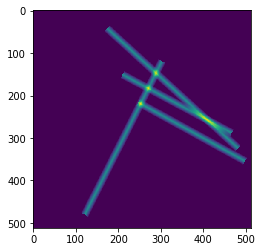

In [21]:
plt.imshow(x[0,0].cpu())

In [7]:
lines[0]

[Line: (x=511.13, y=75.76) - (x=153.74, y=75.76),
 Line: (x=350.79, y=94.03) - (x=161.17, y=94.03),
 Line: (x=462.60, y=21.66) - (x=18.52, y=21.66),
 Line: (x=371.40, y=361.81) - (x=242.76, y=361.81)]